<h1>Cardiovasculer Disease Prediction Machine Learning Project </h1>
<h2>Predicting  Cardiovascular Disease Using a cutting-edge Deep Learning Technique </h2>

In [ ]:
#importing libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from scipy.stats import chi2_contingency

from sklearn.svm import SVC

In [ ]:
df=pd.read_csv('heart_data.csv')
df.head()

,index,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [ ]:
df.tail(20)

,index,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
69980,69980,99971,17727,2,167,69.0,110,80,1,1,0,1,0,0
69981,69981,99972,17500,2,182,110.0,130,90,2,2,0,0,1,1
69982,69982,99973,18941,1,153,86.0,130,90,1,2,0,0,1,1
69983,69983,99974,19652,1,165,72.0,120,80,1,1,0,0,1,0
69984,69984,99975,17926,2,168,80.0,120,80,1,1,0,0,1,1
69985,69985,99977,18194,1,156,102.0,130,80,1,1,0,1,0,1
69986,69986,99978,18198,2,180,78.0,120,80,1,1,0,0,1,0
69987,69987,99979,18852,1,151,49.0,120,80,1,1,0,0,1,0
69988,69988,99981,21978,1,160,59.0,110,70,1,1,0,0,1,0
69989,69989,99985,21013,1,157,83.0,120,70,1,1,0,0,1,1


<h1>Data Information, Cleaning & Visualization</h1>

Age : Age of participant (integer)

Gender : Gender of participant (male/female).

Height : Height measured in centimeters (integer)

Weight : Weight measured in kilograms (integer)

Ap_hi : Systolic blood pressure reading taken from patient (integer)

Ap_lo : Diastolic blood pressure reading taken from patient (integer)

Cholesterol : Total cholesterol level read as mg/dl on a scale 0 - 5+ units (integer). Each unit denoting increase/decrease by 20 mg/dL respectively.

Gluc : Glucose level read as mmol/l on a scale 0 - 16+ units (integer). Each unit denoting increase Decreaseby 1 mmol/L respectively.

Smoke : Whether person smokes or not(binary; 0=No , 1=Yes).

Alco : Whether person drinks alcohol or not(binary; 0=No ,1=Yes).

Active : whether person physically active or not( Binary ; 0=No,1=Yes).

Cardio : whether person suffers from cardiovascular diseases or not(Binary; 0=No , 1=Yes).

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   index        70000 non-null  int64  
 1   id           70000 non-null  int64  
 2   age          70000 non-null  int64  
 3   gender       70000 non-null  int64  
 4   height       70000 non-null  int64  
 5   weight       70000 non-null  float64
 6   ap_hi        70000 non-null  int64  
 7   ap_lo        70000 non-null  int64  
 8   cholesterol  70000 non-null  int64  
 9   gluc         70000 non-null  int64  
 10  smoke        70000 non-null  int64  
 11  alco         70000 non-null  int64  
 12  active       70000 non-null  int64  
 13  cardio       70000 non-null  int64  
dtypes: float64(1), int64(13)
memory usage: 7.5 MB


In [ ]:
df.dtypes

index            int64
id               int64
age              int64
gender           int64
height           int64
weight         float64
ap_hi            int64
ap_lo            int64
cholesterol      int64
gluc             int64
smoke            int64
alco             int64
active           int64
cardio           int64
dtype: object

In [ ]:
df.size

980000

In [ ]:
df.shape

(70000, 14)

In [ ]:
df.columns

Index(['index', 'id', 'age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo',
       'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio'],
      dtype='object')

In [ ]:
df.drop(['index', 'id'], axis = 1, inplace = True)
df['age']=(df['age']/365).astype(int)
df

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,50,2,168,62.0,110,80,1,1,0,0,1,0
1,55,1,156,85.0,140,90,3,1,0,0,1,1
2,51,1,165,64.0,130,70,3,1,0,0,0,1
3,48,2,169,82.0,150,100,1,1,0,0,1,1
4,47,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
69995,52,2,168,76.0,120,80,1,1,1,0,1,0
69996,61,1,158,126.0,140,90,2,2,0,0,1,1
69997,52,2,183,105.0,180,90,3,1,0,1,0,1
69998,61,1,163,72.0,135,80,1,2,0,0,0,1


In [ ]:
df.columns

Index(['age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol',
       'gluc', 'smoke', 'alco', 'active', 'cardio'],
      dtype='object')

In [ ]:
df.isnull().sum()

age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [ ]:
df.nunique()

age             28
gender           2
height         109
weight         287
ap_hi          153
ap_lo          157
cholesterol      3
gluc             3
smoke            2
alco             2
active           2
cardio           2
dtype: int64

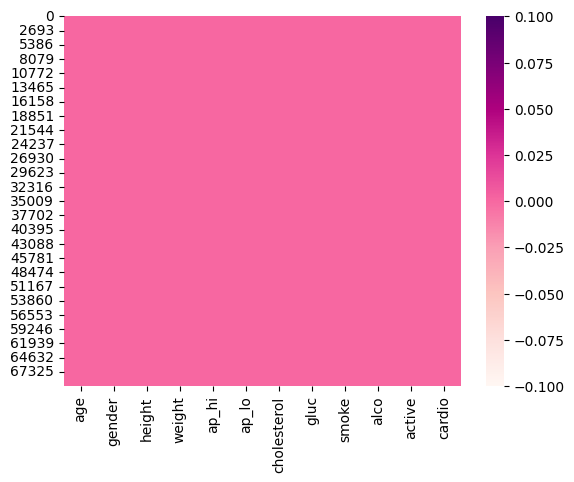

In [ ]:
sns.heatmap(df.isnull(), cmap="RdPu" );

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,70000.0,52.840671,6.766774,29.0,48.0,53.0,58.0,64.0
gender,70000.0,1.349571,0.476838,1.0,1.0,1.0,2.0,2.0
height,70000.0,164.359229,8.210126,55.0,159.0,165.0,170.0,250.0
weight,70000.0,74.205690,14.395757,10.0,65.0,72.0,82.0,200.0
ap_hi,70000.0,128.817286,154.011419,-150.0,120.0,120.0,140.0,16020.0
ap_lo,70000.0,96.630414,188.472530,-70.0,80.0,80.0,90.0,11000.0
cholesterol,70000.0,1.366871,0.680250,1.0,1.0,1.0,2.0,3.0
gluc,70000.0,1.226457,0.572270,1.0,1.0,1.0,1.0,3.0
smoke,70000.0,0.088129,0.283484,0.0,0.0,0.0,0.0,1.0
alco,70000.0,0.053771,0.225568,0.0,0.0,0.0,0.0,1.0


In [ ]:
df_corr = df.corr()
df_corr

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
age,1.000000,-0.022913,-0.081506,0.053561,0.020854,0.017620,0.154012,0.098388,-0.047649,-0.029756,-0.009998,0.237985
gender,-0.022913,1.000000,0.499033,0.155406,0.006005,0.015254,-0.035821,-0.020491,0.338135,0.170966,0.005866,0.008109
height,-0.081506,0.499033,1.000000,0.290968,0.005488,0.006150,-0.050226,-0.018595,0.187989,0.094419,-0.006570,-0.010821
weight,0.053561,0.155406,0.290968,1.000000,0.030702,0.043710,0.141768,0.106857,0.067780,0.067113,-0.016867,0.181660
ap_hi,0.020854,0.006005,0.005488,0.030702,1.000000,0.016086,0.023778,0.011841,-0.000922,0.001408,-0.000033,0.054475
ap_lo,0.017620,0.015254,0.006150,0.043710,0.016086,1.000000,0.024019,0.010806,0.005186,0.010601,0.004780,0.065719
cholesterol,0.154012,-0.035821,-0.050226,0.141768,0.023778,0.024019,1.000000,0.451578,0.010354,0.035760,0.009911,0.221147
gluc,0.098388,-0.020491,-0.018595,0.106857,0.011841,0.010806,0.451578,1.000000,-0.004756,0.011246,-0.006770,0.089307
smoke,-0.047649,0.338135,0.187989,0.067780,-0.000922,0.005186,0.010354,-0.004756,1.000000,0.340094,0.025858,-0.015486
alco,-0.029756,0.170966,0.094419,0.067113,0.001408,0.010601,0.035760,0.011246,0.340094,1.000000,0.025476,-0.007330


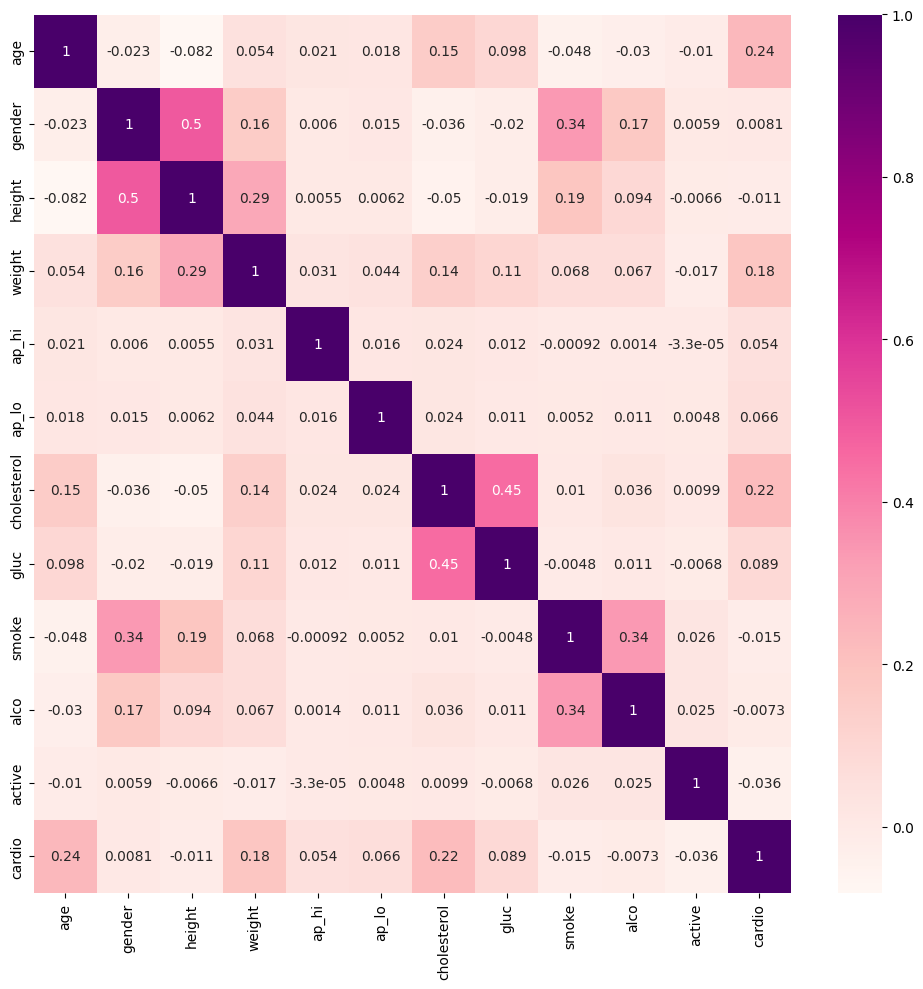

In [ ]:
plt.figure(figsize=(10, 10))
correlation=df.corr(numeric_only=True)
sns.heatmap(correlation, annot=True, cmap='RdPu')
plt.tight_layout()

In [ ]:
df['cardio'].value_counts()

cardio
0    35021
1    34979
Name: count, dtype: int64

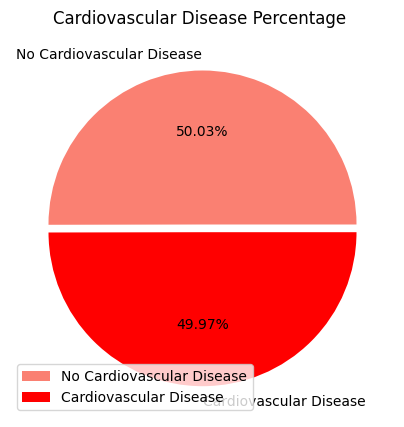

In [ ]:
plt.figure(figsize = (5, 5))
plt.title('Cardiovascular Disease Percentage ')
plt.pie(df['cardio'].value_counts(), labels = ['No Cardiovascular Disease', 'Cardiovascular Disease'], explode = (0.0, 0.05), colors = ['salmon', 'red'],autopct = '%1.2f%%', shadow = False)
plt.legend(loc = 'best');

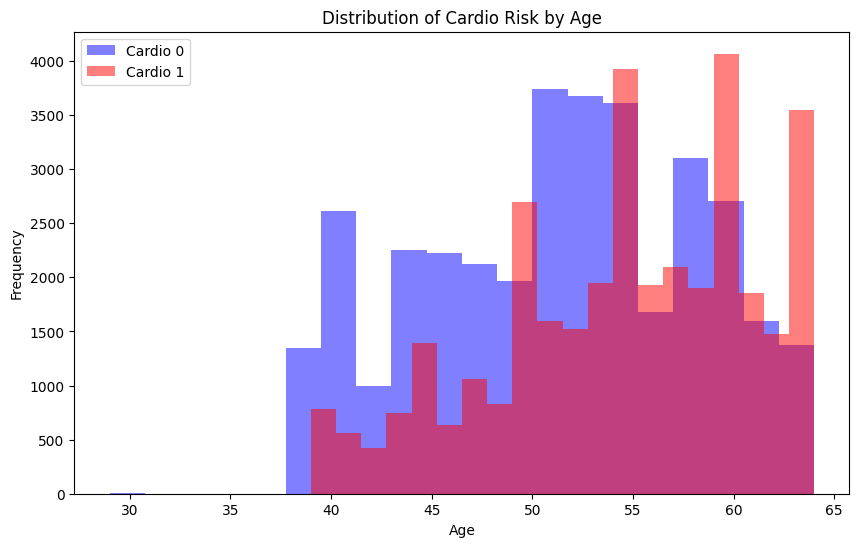

In [ ]:
#the risk of cardio by age
plt.figure(figsize=(10, 6))
plt.hist(df[df['cardio'] == 0]['age'], bins=20, color='blue', alpha=0.5, label='Cardio 0')
plt.hist(df[df['cardio'] == 1]['age'], bins=20, color='red', alpha=0.5, label='Cardio 1')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Cardio Risk by Age')
plt.legend()
plt.show()

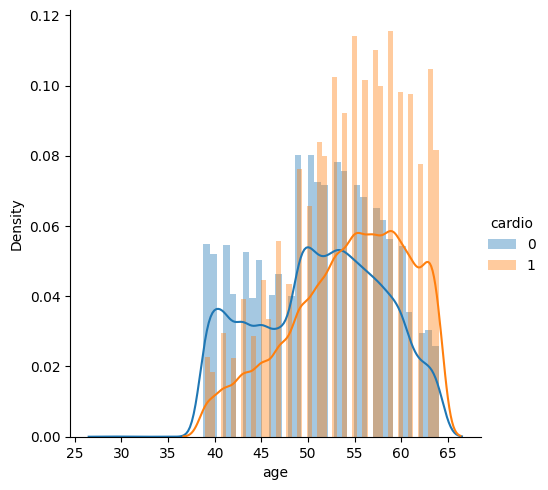

In [ ]:
sea = sns.FacetGrid(data=df, hue="cardio", height=5)
sea.map(sns.distplot, "age").add_legend()

In [ ]:
df['gender'].replace({1: 'Male', 2: 'female'}, inplace=True)
df['cardio'].replace({0:'No Cardio', 1:'With Cardio'}, inplace=True)

In [ ]:
gender_counts = df['gender'].value_counts()
gender_counts

gender
Male      45530
female    24470
Name: count, dtype: int64

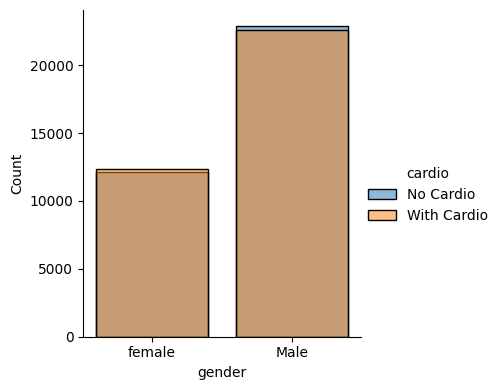

In [ ]:
sea = sns.FacetGrid(data=df, hue="cardio", height=4)
sea.map(sns.histplot, "gender", shrink=0.8, alpha=0.5)
sea.add_legend()

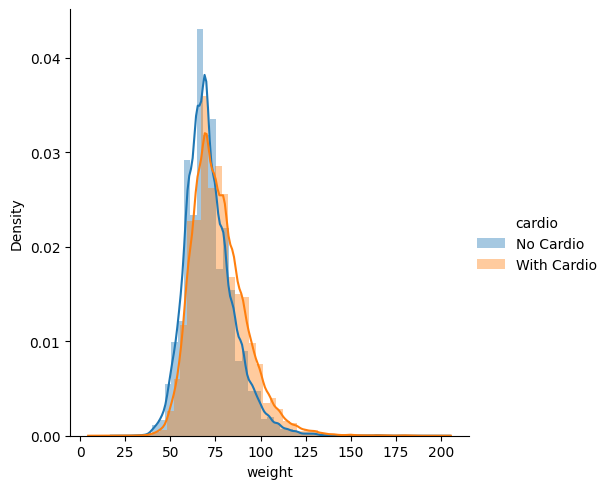

In [ ]:
sea = sns.FacetGrid(data=df, hue="cardio", height=5)
sea.map(sns.distplot, "weight")
sea.add_legend()

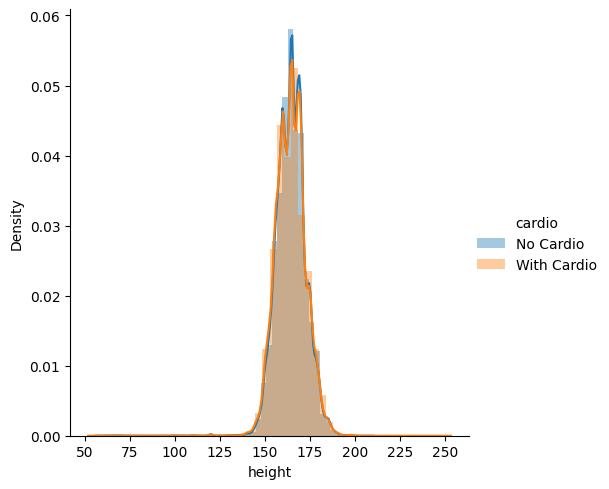

In [ ]:
sea = sns.FacetGrid(data=df, hue="cardio", height=5)
sea.map(sns.distplot, "height")
sea.add_legend()

In [ ]:
df['cholesterol']=df['cholesterol'].replace({1: 'normal', 2: 'above normal', 3: 'well above normal' })
cholesterol_counts2 = df['cholesterol'].value_counts()
cholesterol_counts2

cholesterol
normal               52385
above normal          9549
well above normal     8066
Name: count, dtype: int64

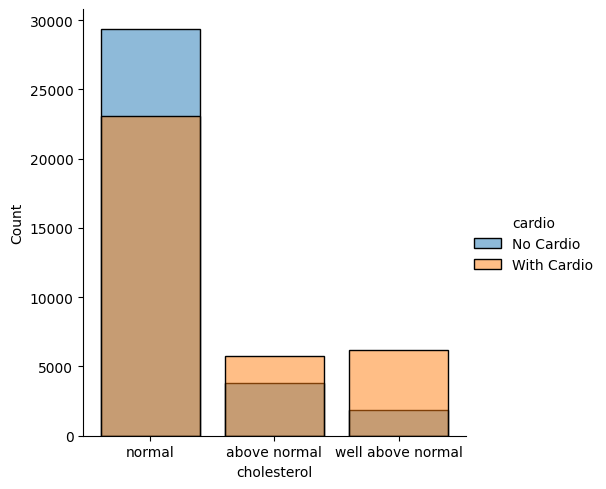

In [ ]:
sea = sns.FacetGrid(data=df, hue="cardio", height=5)
sea.map(sns.histplot, "cholesterol", shrink=0.8, alpha=0.5)
sea.add_legend()

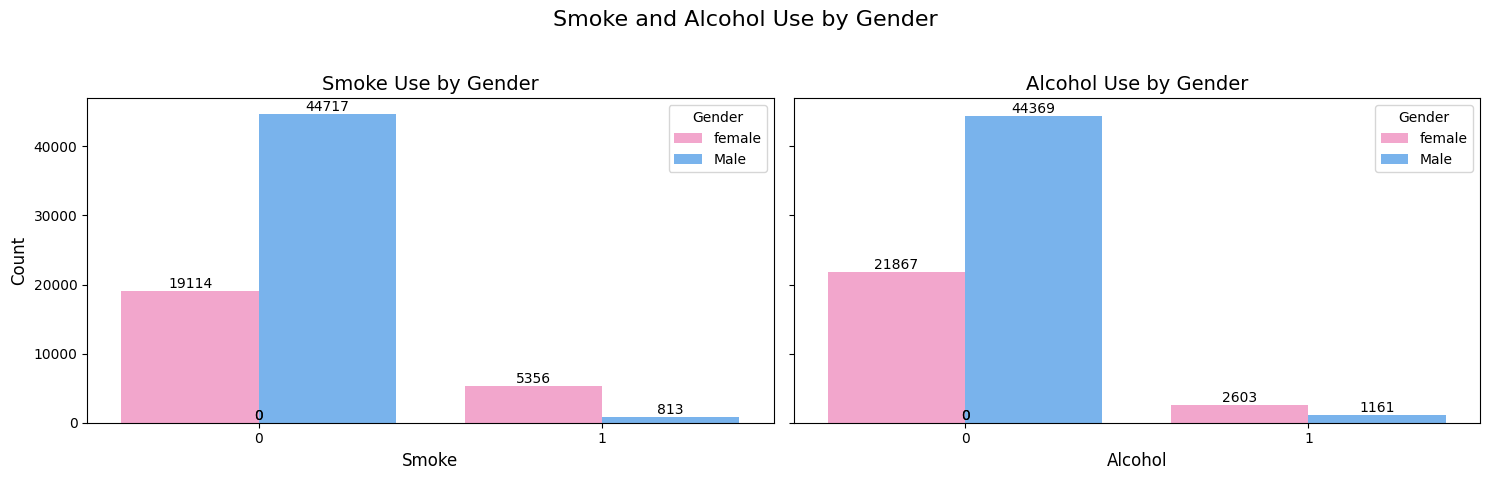

In [ ]:
colors = ['#ff99cc', '#66b3ff']

fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=True)

fig.suptitle('Smoke and Alcohol Use by Gender', fontsize=16)

sns.countplot(ax=axes[0], x=df.smoke, hue=df.gender, palette=colors)
axes[0].set_title("Smoke Use by Gender", fontsize=14)
axes[0].set_xlabel("Smoke", fontsize=12)
axes[0].set_ylabel("Count", fontsize=12)
axes[0].legend(title="Gender")

sns.countplot(ax=axes[1], x=df.alco, hue=df.gender, palette=colors)
axes[1].set_title("Alcohol Use by Gender", fontsize=14)
axes[1].set_xlabel("Alcohol", fontsize=12)
axes[1].set_ylabel("")
axes[1].legend(title="Gender")

for ax in axes:
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.0f'),
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha = 'center', va = 'center',
                    xytext = (0, 5),
                    textcoords = 'offset points')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


In [ ]:
df['gluc']=df['gluc'].replace({1: 'normal', 2: 'above normal', 3: 'well above normal' })

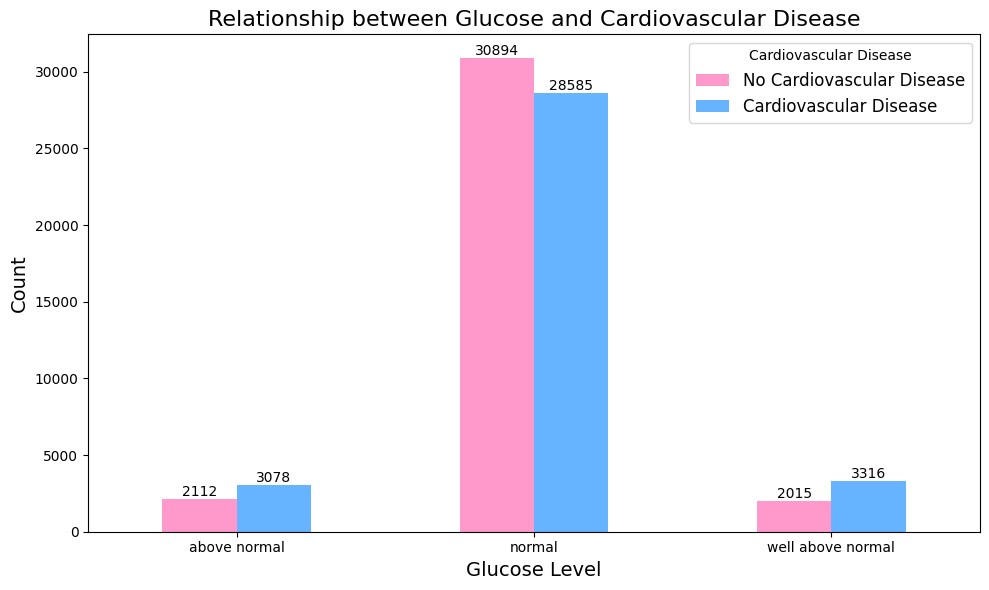

In [ ]:
colors = ['#ff99cc', '#66b3ff']

cross_tab = pd.crosstab(df['gluc'], df['cardio'])

ax = cross_tab.plot(kind='bar', color=colors, figsize=(10, 6))

plt.title('Relationship between Glucose and Cardiovascular Disease', fontsize=16)
plt.xlabel('Glucose Level', fontsize=14)
plt.ylabel('Count', fontsize=14)

plt.legend(title='Cardiovascular Disease', labels=['No Cardiovascular Disease', 'Cardiovascular Disease'], fontsize=12)

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 5),
                textcoords = 'offset points',
                fontsize=10)

plt.xticks(rotation=0)
plt.tight_layout()

plt.show()

In [ ]:
df['bmi'] = df['weight'] / ((df['height'] / 100) ** 2)

print(df[['weight', 'height', 'bmi']].head())

   weight  height        bmi
0    62.0     168  21.967120
1    85.0     156  34.927679
2    64.0     165  23.507805
3    82.0     169  28.710479
4    56.0     156  23.011177


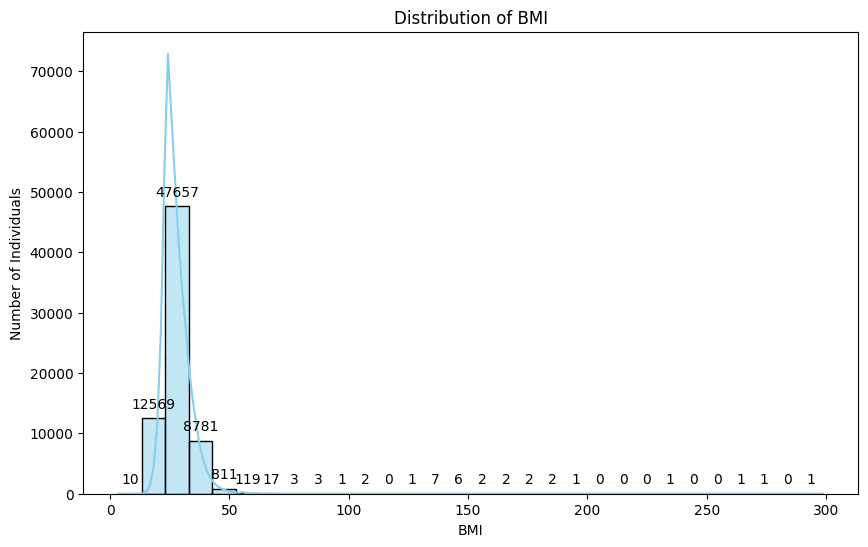

In [ ]:
plt.figure(figsize=(10, 6))
ax = sns.histplot(df['bmi'], bins=30, kde=True, color='skyblue')

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom', xytext=(0, 5), textcoords='offset points')

plt.title('Distribution of BMI')
plt.xlabel('BMI')
plt.ylabel('Number of Individuals')

plt.show()

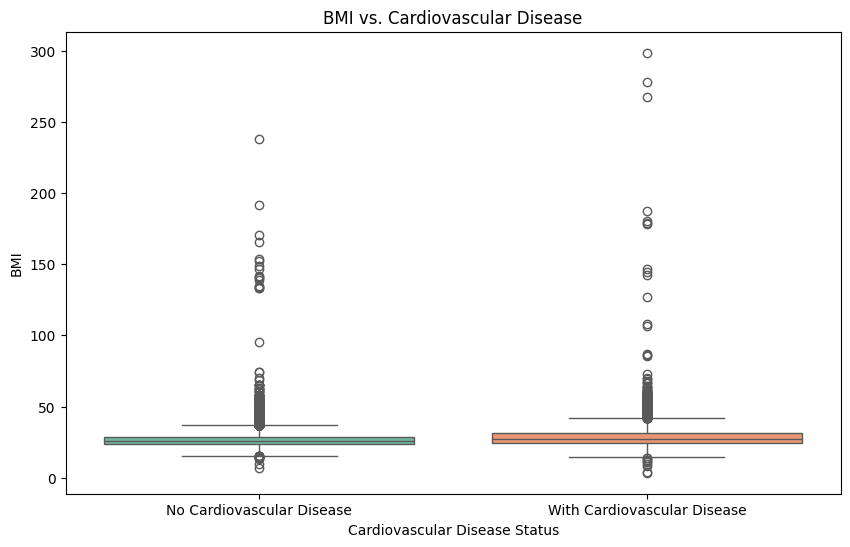

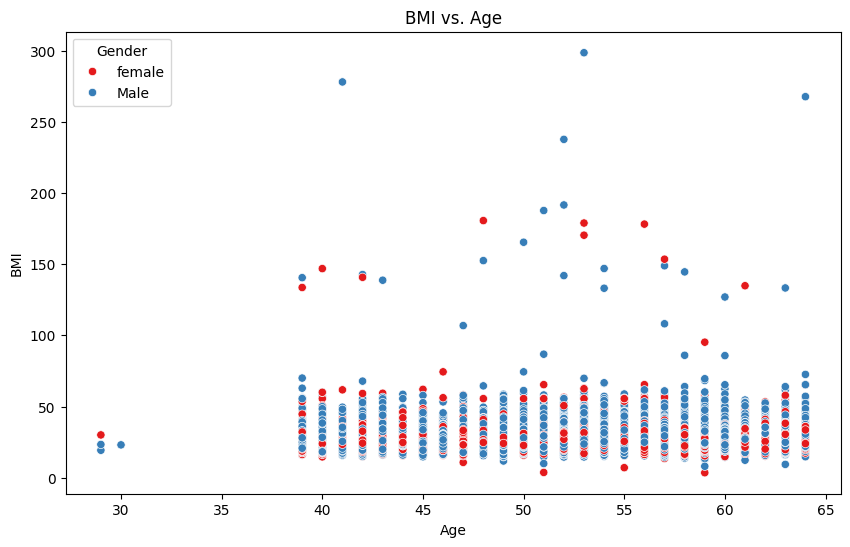

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='cardio', y='bmi', data=df, palette='Set2')
plt.title('BMI vs. Cardiovascular Disease')
plt.xlabel('Cardiovascular Disease Status')
plt.ylabel('BMI')
plt.xticks([0, 1], ['No Cardiovascular Disease', 'With Cardiovascular Disease'])
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='bmi', data=df, hue='gender', palette='Set1')
plt.title('BMI vs. Age')
plt.xlabel('Age')
plt.ylabel('BMI')
plt.legend(title='Gender')
plt.show()

T-statistic: nan
P-value: nan
There is no significant difference in BMI between individuals with and without cardiovascular disease.


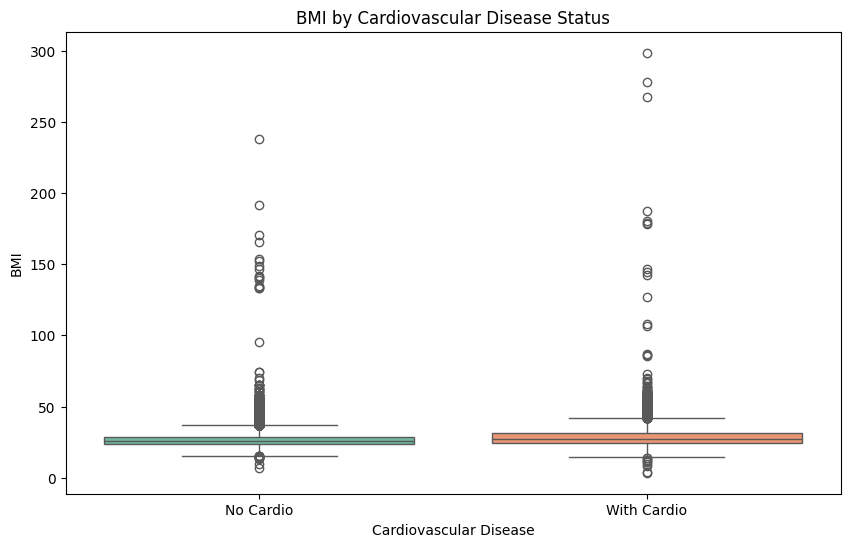

In [ ]:
from scipy.stats import ttest_ind

bmi_cardio_0 = df[df['cardio'] == 0]['bmi']
bmi_cardio_1 = df[df['cardio'] == 1]['bmi']

t_stat, p_value = ttest_ind(bmi_cardio_0, bmi_cardio_1)
print("T-statistic:", t_stat)
print("P-value:", p_value)

if p_value < 0.05:
    print("There is a significant difference in BMI between individuals with and without cardiovascular disease.")
else:
    print("There is no significant difference in BMI between individuals with and without cardiovascular disease.")

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.boxplot(x='cardio', y='bmi', data=df, palette='Set2')
plt.title('BMI by Cardiovascular Disease Status')
plt.xlabel('Cardiovascular Disease')
plt.ylabel('BMI')
plt.xticks([0, 1], ['No Cardio', 'With Cardio'])
plt.show()

In [ ]:
def classify_blood_pressure(ap_hi, ap_lo):
    if ap_hi < 120 and ap_lo < 80:
        return 'Normal'
    elif 120 <= ap_hi < 130 and ap_lo < 80:
        return 'Elevated'
    elif 130 <= ap_hi < 140 or 80 <= ap_lo < 90:
        return 'Hypertension Stage 1'
    elif ap_hi >= 140 or ap_lo >= 90:
        return 'Hypertension Stage 2'
    else:
        return 'Unknown'

df['blood_pressure_category'] = df.apply(lambda row: classify_blood_pressure(row['ap_hi'], row['ap_lo']), axis=1)

blood_pressure_distribution = df.groupby(['blood_pressure_category', 'cardio']).size().unstack(fill_value=0)
print(blood_pressure_distribution)

cardio                   No Cardio  With Cardio
blood_pressure_category                        
Elevated                      2113         1012
Hypertension Stage 1         22011        17923
Hypertension Stage 2          3421        13912
Normal                        7476         2132


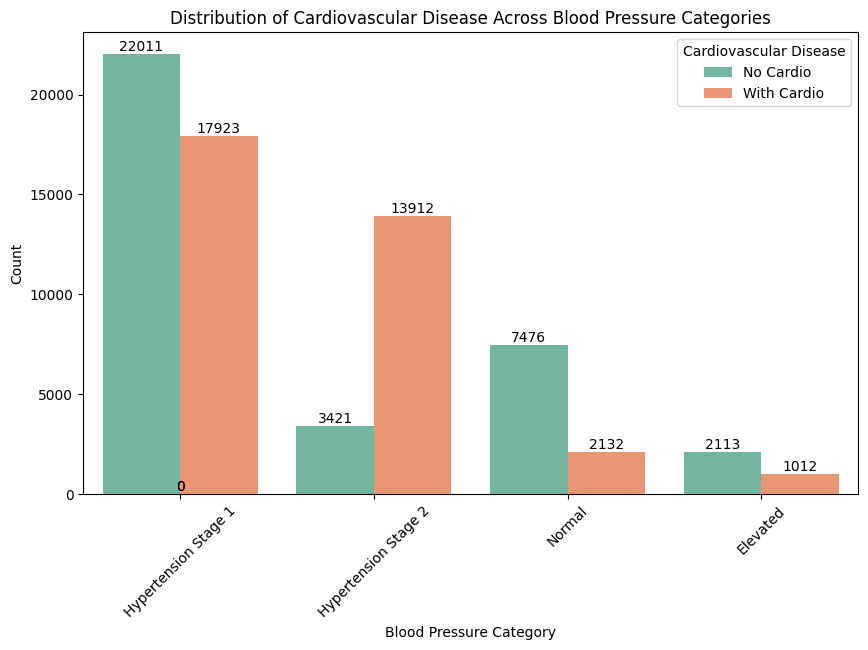

In [ ]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df, x='blood_pressure_category', hue='cardio', palette='Set2')

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 5),
                textcoords = 'offset points')

plt.title('Distribution of Cardiovascular Disease Across Blood Pressure Categories')
plt.xlabel('Blood Pressure Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Cardiovascular Disease', labels=['No Cardio', 'With Cardio'])
plt.show()

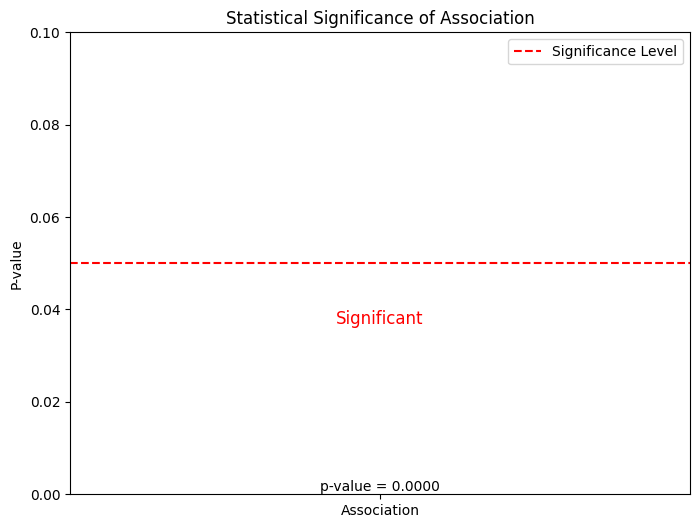

In [ ]:
import matplotlib.pyplot as plt

alpha = 0.05

plt.figure(figsize=(8, 6))
plt.bar(['Association'], [p], color='skyblue', alpha=0.7)

plt.axhline(y=alpha, color='red', linestyle='--', label='Significance Level')

plt.title('Statistical Significance of Association')
plt.ylabel('P-value')
plt.ylim(0, 0.1)
plt.legend()

plt.text(0, p, f'p-value = {p:.4f}', ha='center', va='bottom')

if p < alpha:
    plt.text(0, alpha - 0.01, 'Significant', color='red', ha='center', va='top', fontsize=12)

plt.show()

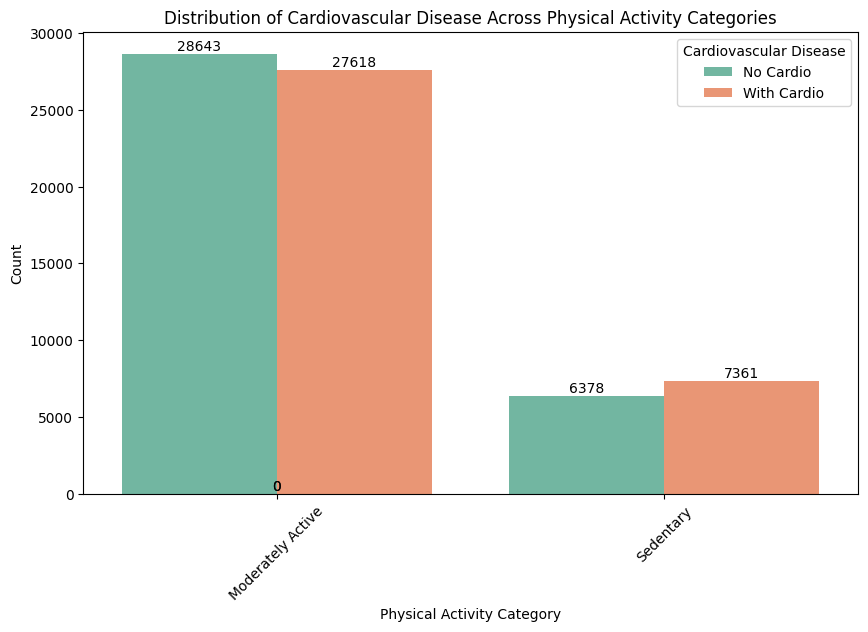

In [ ]:
def categorize_activity(activity):
    if activity == 0:
        return 'Sedentary'
    elif activity == 1:
        return 'Moderately Active'
    elif activity == 2:
        return 'Highly Active'
    else:
        return 'Unknown'

df['activity_category'] = df['active'].apply(categorize_activity)

plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df, x='activity_category', hue='cardio', palette='Set2')
plt.title('Distribution of Cardiovascular Disease Across Physical Activity Categories')
plt.xlabel('Physical Activity Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Cardiovascular Disease', labels=['No Cardio', 'With Cardio'])

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 5),
                textcoords = 'offset points')

plt.show()

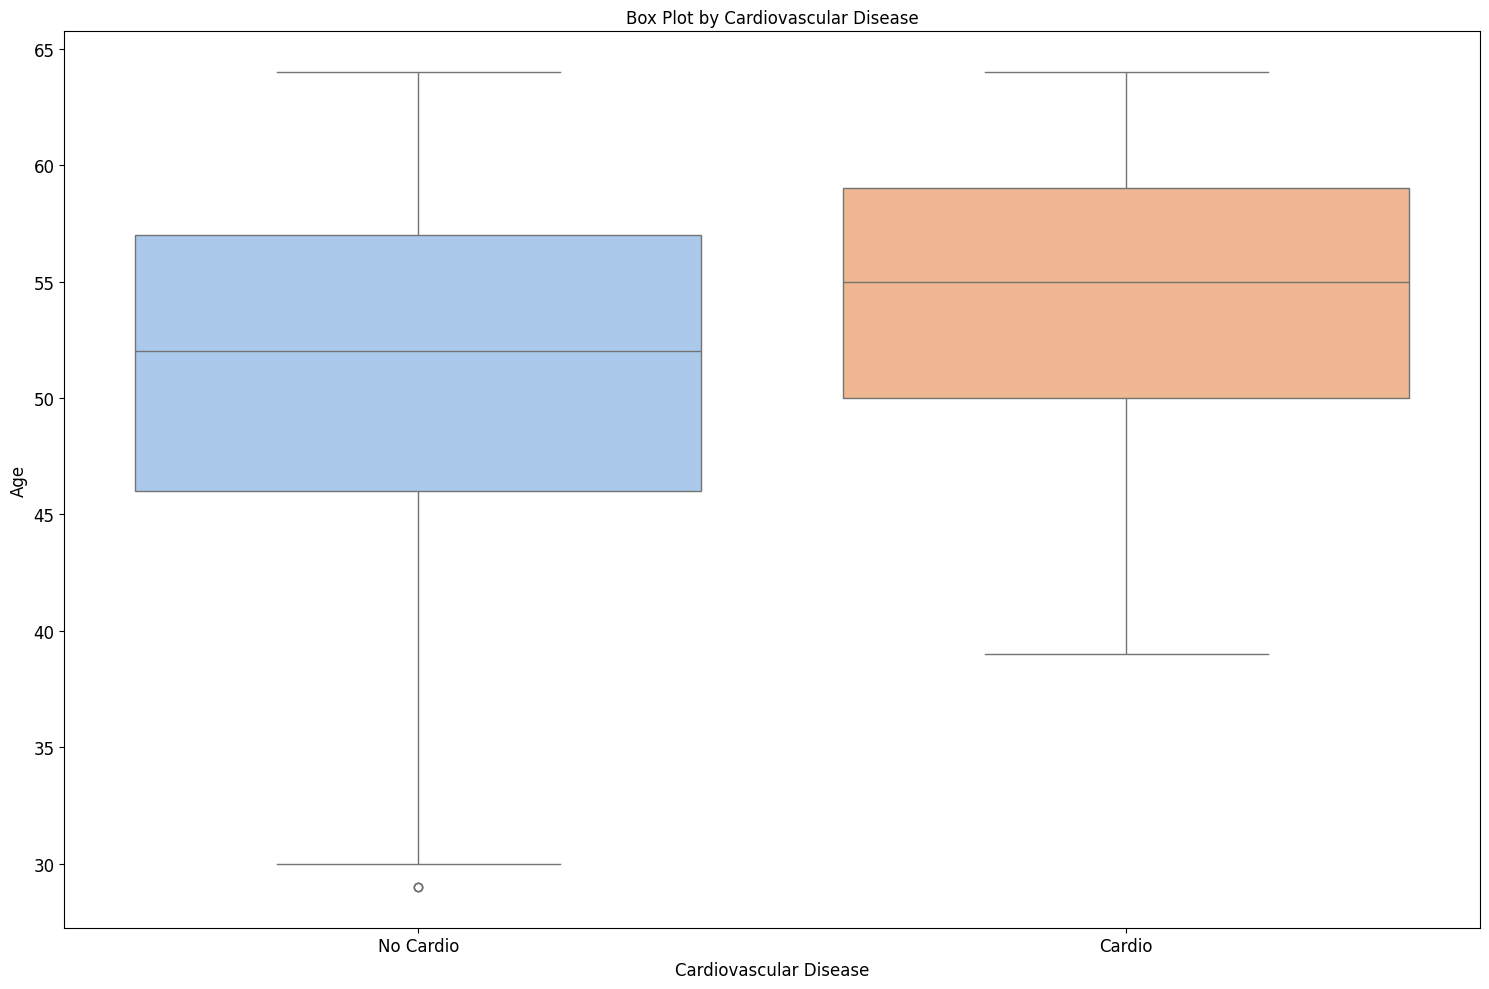

In [ ]:
plt.figure(figsize=(15, 10))
plt.title('Box Plot by Cardiovascular Disease')
sns.boxplot(x='cardio', y='age', data=df, palette='pastel')
plt.xlabel('Cardiovascular Disease', fontsize=12)
plt.ylabel('Age', fontsize=12)
plt.xticks(ticks=[0, 1], labels=['No Cardio', 'Cardio'], fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

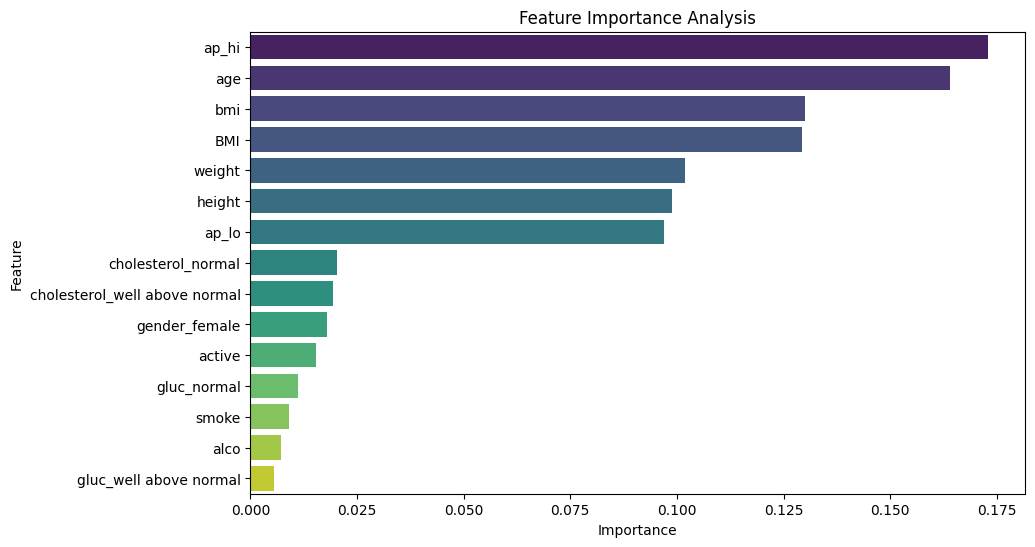

In [ ]:
X = df.drop(['cardio'], axis=1)
y = df['cardio']

categorical_cols = ['gender', 'cholesterol', 'gluc']

numeric_transformer = 'passthrough'
categorical_transformer = OneHotEncoder(drop='first')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, X.select_dtypes(include=['int64', 'float64']).columns),
        ('cat', categorical_transformer, categorical_cols)
    ])

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', rf_classifier)])

pipeline.fit(X, y)

feature_importances = pipeline.named_steps['classifier'].feature_importances_

encoded_categorical_cols = pipeline.named_steps['preprocessor'].named_transformers_['cat'].get_feature_names_out(input_features=categorical_cols)
feature_names = list(X.select_dtypes(include=['int64', 'float64']).columns) + list(encoded_categorical_cols)

feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance_df, x='Importance', y='Feature', palette='viridis')
plt.title('Feature Importance Analysis')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

In [ ]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(drop='first', sparse=False)
X_encoded = encoder.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.1, random_state=0)

svm_classifier = SVC(kernel='linear', random_state=0)

svm_classifier.fit(X_train, y_train)

svm_score = svm_classifier.score(X_test, y_test)
print("Accuracy of SVM classifier:", svm_score)
